(30, 30)


<Figure size 1200x900 with 0 Axes>

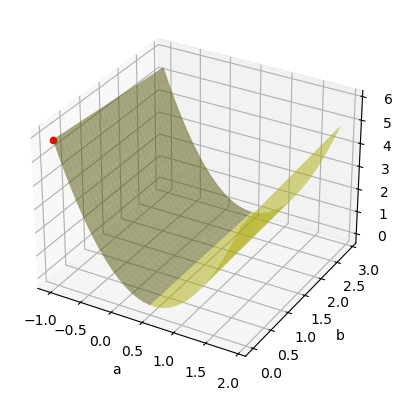

In [103]:
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(12, 9))

def E(y, a, b):
    ff = np.array([a * z + b for z in range(N)])
    return np.dot((y - ff).T, (y - ff))
def dEda(y, a, b):
    ff = np.array([a * z + b for z in range(N)])
    return -2 * np.dot((y - ff).T[:, 0], range(N))
def dEdb(y, a, b):
    ff = np.array([a * z + b for z in range(N)])
    return -2 * (y - ff).sum()
    
N = 100 # число экспериметов
Niter = 50 # число итераций
sigma = 3 # стандартное отклонение
at = 0.5 # теоретическое значение параметра а
bt = 2 # теоритическое значение параметра b
aa = -1 # начальное приближение(значение) а
bb = 0 # начальное приближение(значение) b
lmd1 = 0.000001 # значение лямбды параметра а
lmd2 = 0.00025 # значение лямбды параметра b

f = np.array([at * z + bt for z in range(N)])
y = np.array([f + np.random.normal(0, sigma, N)])

a_plt = np.arange(-1, 2, 0.1)
b_plt = np.arange(0, 3, 0.1)
E_plt = np.array([[E(y, a, b).sum() for a in a_plt] for b in b_plt])
print(E_plt.shape)

#plt.ion()   # включение интерактивного режима отображения графиков
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

a, b = np.meshgrid(a_plt, b_plt)
ax.plot_surface(a, b, E_plt, color='y', alpha=0.5)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('E')

ax.scatter(aa, bb, E(y, aa, bb).sum(), c='red')  # отображение точки красным цветом
plt.show()

0.006967872583060641 1.3263048736648324
0.3395295249915436 1.7632044139354281
0.44937263481469697 1.9063972803801894
0.48566416503918236 1.952608966197111
0.4976655516756607 1.966806635797903
0.5016450707789158 1.9704451121380988
0.5029752187712954 1.9706095483801456
0.5034302306582831 1.9696396083897953
0.5035960386449904 1.968307790631862
0.5036661455226306 1.9668690492396659
0.5037044567535072 1.9654074246206599
0.5037320790827953 1.9639505159676163
0.503755985224105 1.9625072850474832
0.5037784801885259 1.9610805406364151
0.5038003274794812 1.959671061400786
0.5038217814988989 1.9582789574288797
0.5038429284930869 1.9569041198449533
0.5038637991482725 1.9555463692686388
0.5038844057749032 1.954205504820229
0.5039047545878648 1.9528813202821598
0.5039248497622814 1.951573609414313
0.5039446947732503 1.9502821676877105
0.5039642928386093 1.9490067928356745
0.5039836470654822 1.94774728501473
0.504002760498995 1.9465034468368887
0.5040216361386806 1.9452750833597177
0.5040402769442086

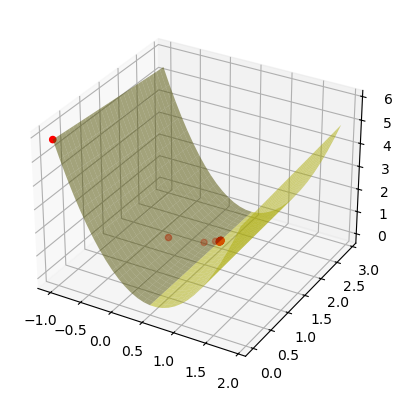

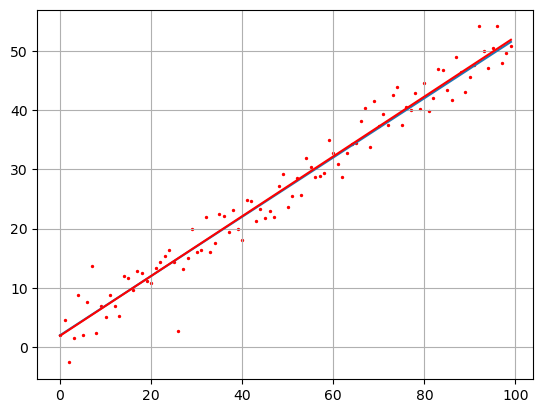

In [104]:
track = [aa, bb]
for n in range(Niter):
    aa = aa - lmd1 * dEda(y, aa, bb)
    bb = bb - lmd2 * dEdb(y, aa, bb)

    #ax.scatter(aa, bb, E(y, aa, bb), c='red')

    # перерисовка графика и задержка на 10 мс
    #fig.canvas.draw()
    #fig.canvas.flush_events()
    track += [aa, bb]
    print(aa, bb)
print(len(track[1::2]))
#plt.ioff()   # выключение интерактивного режима отображения графиков
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(a, b, E_plt, color='y', alpha=0.5)
ax.scatter(track[::2], track[1::2], [E(y, a, b).sum() for a, b in zip(track[::2], track[1::2])], c='red')
plt.show()

# отображение графиков аппроксимации
ff = np.array([aa*z+bb for z in range(N)])

plt.scatter(range(N), y, s=2, c='red')
plt.plot(f)
plt.plot(ff, c='red')
plt.grid(True)
plt.show()

In [105]:
np.mean(ff - f)

0.1382891172948448

In [106]:
np.sum(E(y, aa, bb))

2.9866583509101066